# OSS-Fuzz Data Analysis
Generates Figure 1 in https://mboehme.github.io/paper/CCS21.pdf.

To cite this data or evaluation, please use
```bibtex
@inproceedings{aflchurn,
 author = {Zhu, Xiaogang and B{\"o}hme, Marcel}, 
 title = {Regression Greybox Fuzzing},
 booktitle = {Proceedings of the 28th ACM Conference on Computer and Communications Security},
 series = {CCS},
 year = {2021},
 numpages = {12},
}
```

## Requirements

## Setup

In [1]:
library(ggplot2)
library(dplyr)
library(stringr)
library(scales)
library(tidyr)

# plot in black and white
theme_set(theme_bw())

Warning message:
"package 'ggplot2' was built under R version 3.5.2"
Warning message:
"package 'dplyr' was built under R version 3.5.2"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'stringr' was built under R version 3.5.2"
Warning message:
"package 'hash' was built under R version 3.5.2"
hash-2.2.6.1 provided by Decision Patterns




## Load OSS-Fuzz Data

In [2]:
ossfuzz = read.csv("ossfuzz.reports.csv",header=TRUE)
ossfuzz$reported = as.Date(as.character(ossfuzz$reported), format ="%Y%m%d")


print(paste("Number of Projects: ", length(levels(factor(ossfuzz$project)))))
print(paste("Number of Bugs: ", length(levels(factor(ossfuzz$issue)))))
print(paste("Average  Number of Regressions: ", mean(ossfuzz$is_regression)))
print(paste("Average Time-To-Error: ", mean(na.omit(ossfuzz$discovery_days))))
print(paste("Median Time-To-Error: ", median(na.omit(ossfuzz$discovery_days))))

summary(ossfuzz)

print(paste("Avg. #regressions (bug_id<=10): ", mean(subset(ossfuzz,bug_id<11)$is_regression)))
print(paste("Avg. #regressions (bug_id>300): ", mean(subset(ossfuzz,bug_id>300)$is_regression)))
print(paste("Num. of Reports   (bug_id=100): ", nrow(subset(ossfuzz,bug_id==100))))
print(paste("Avg. regressions  (bug_id=100): ", mean(subset(ossfuzz,bug_id==100)$is_regression)))
print(paste("Avg. regressions  (bug_id=1): ", mean(subset(ossfuzz,bug_id==1)$is_regression)))
print(paste("Avg. regressions  (bug_id=1000): ", mean(subset(ossfuzz,bug_id==1000)$is_regression)))

[1] "Number of Projects:  326"
[1] "Number of Bugs:  22582"
[1] "Average  Number of Regressions:  0.772020047940728"
[1] "Average Time-To-Error:  68.3582477136728"
[1] "Median Time-To-Error:  5"


     issue               project          bug_id       is_regression  
 Min.   :    5    ffmpeg     : 2172   Min.   :   1.0   Min.   :0.000  
 1st Qu.: 6238    imagemagick: 1640   1st Qu.:  30.0   1st Qu.:1.000  
 Median :13277    llvm       : 1590   Median : 117.0   Median :1.000  
 Mean   :13415    gdal       : 1518   Mean   : 361.5   Mean   :0.772  
 3rd Qu.:20532    libreoffice: 1114   3rd Qu.: 545.0   3rd Qu.:1.000  
 Max.   :29087    skia       :  785   Max.   :2172.0   Max.   :1.000  
                 (Other)     :14126                                   
   regressed           reported              fixed          discovery_days   
 Min.   :20160524   Min.   :2016-05-27   Min.   :20170215   Min.   :   0.00  
 1st Qu.:20180103   1st Qu.:2018-02-12   1st Qu.:20180303   1st Qu.:   1.00  
 Median :20181024   Median :2019-02-22   Median :20190307   Median :   5.00  
 Mean   :20184907   Mean   :2019-02-02   Mean   :20187138   Mean   :  68.36  
 3rd Qu.:20191127   3rd Qu.:2020-02-05   3

[1] "Avg. #regressions (bug_id<=10):  0.419152276295133"
[1] "Avg. #regressions (bug_id>300):  0.924847405900305"
[1] "Num. of Reports   (bug_id=100):  50"
[1] "Avg. regressions  (bug_id=100):  0.76"
[1] "Avg. regressions  (bug_id=1):  0.202453987730061"
[1] "Avg. regressions  (bug_id=1000):  1"


## Figure 1. Empirical Investigation of Bug Reports in OSS-Fuzz

     bug_id         regression     number_of_bugs  
 Min.   :   1.0   Min.   :0.0000   Min.   :  1.00  
 1st Qu.: 543.8   1st Qu.:0.8333   1st Qu.:  2.00  
 Median :1086.5   Median :1.0000   Median :  5.00  
 Mean   :1086.5   Mean   :0.9182   Mean   : 10.56  
 3rd Qu.:1629.2   3rd Qu.:1.0000   3rd Qu.:  8.00  
 Max.   :2172.0   Max.   :1.0000   Max.   :326.00  

Saving 6 x 3.5 in image



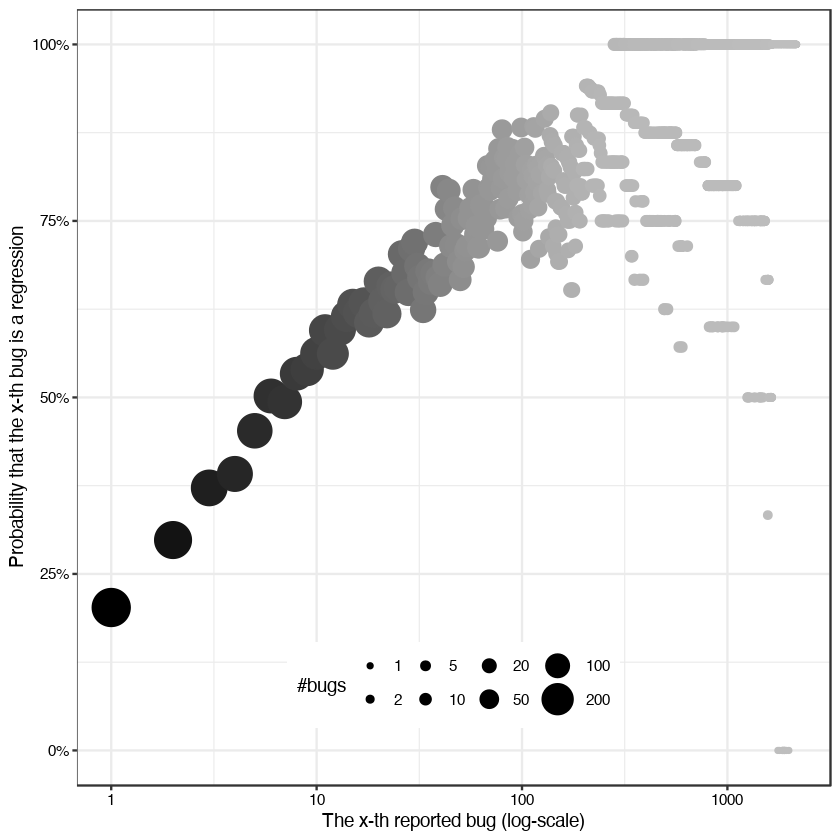

In [6]:
d1 = ossfuzz %>%
  group_by(bug_id) %>%
  summarize(regression = mean(is_regression, na.rm=TRUE), number_of_bugs = length(is_regression))
summary(d1)

ggplot(d1,aes(bug_id,regression)) +
  geom_point(aes(color=number_of_bugs,size=number_of_bugs)) +
  scale_x_log10() +
  scale_y_continuous(labels=scales::percent, limits=c(0,1))+
  scale_colour_gradient(name="#bugs",low = "grey",high = "black") +
  scale_size_continuous(name="#bugs",breaks=c(1,2,5,10,20,50,100,200,500,1000),range = c(1, 10))+
  xlab("The x-th reported bug (log-scale)") +
  ylab("Probability that the x-th bug is a regression") +
  guides(colour=FALSE) +
  theme(legend.position=c(0.5,0.13), legend.direction = "horizontal",
        axis.text.x = element_text(colour="black"), axis.text.y = element_text(colour="black"))

ggsave("Figure.1a.pdf",width=12,scale=0.5)

Joining, by = "project"



     bug_id       median_days_since_first_report   regression    
 Min.   :   1.0   Min.   :   0.0                 Min.   :0.0000  
 1st Qu.: 543.8   1st Qu.: 408.0                 1st Qu.:0.8333  
 Median :1086.5   Median : 789.0                 Median :1.0000  
 Mean   :1086.5   Mean   : 773.5                 Mean   :0.9182  
 3rd Qu.:1629.2   3rd Qu.:1092.2                 3rd Qu.:1.0000  
 Max.   :2172.0   Max.   :1471.0                 Max.   :1.0000  
 number_of_bugs  
 Min.   :  1.00  
 1st Qu.:  2.00  
 Median :  5.00  
 Mean   : 10.56  
 3rd Qu.:  8.00  
 Max.   :326.00  

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 58 rows containing missing values (geom_smooth)."
Saving 6 x 3.5 in image

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 58 rows containing missing values (geom_smooth)."


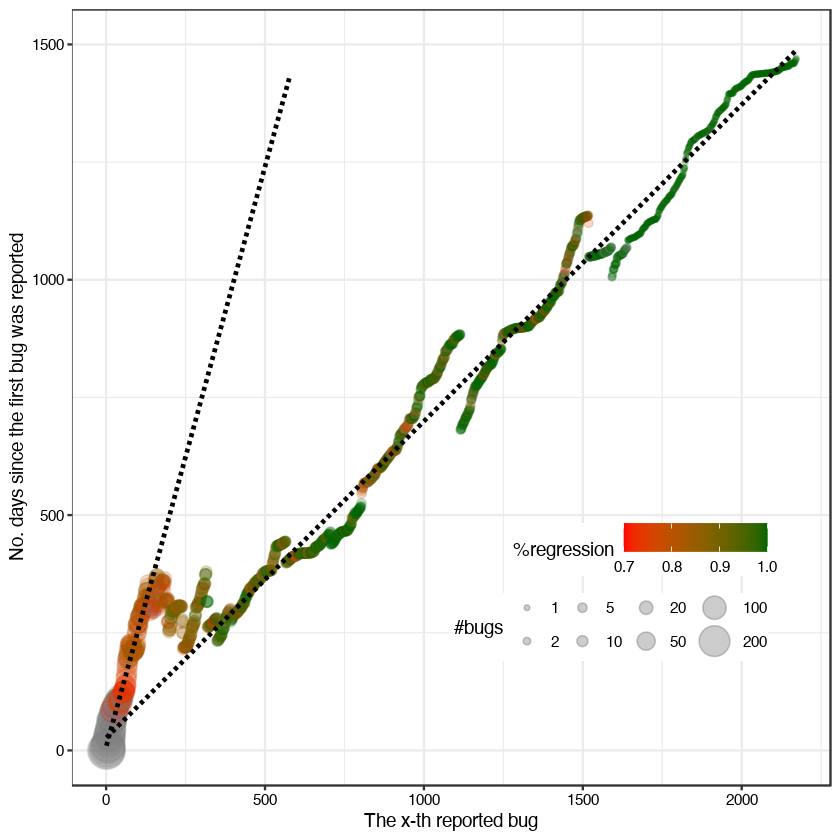

In [3]:
first_bug_reported = ossfuzz %>% group_by(project) %>% summarize(date_of_first_bug = min(reported))
names(first_bug_reported)[names(first_bug_reported) == "reported"] <- "first_bug_reported"

report_time = ossfuzz %>% 
  left_join(first_bug_reported) %>% 
  group_by(project) %>% 
  mutate(days_since_first_report=as.numeric(reported-date_of_first_bug,units="days")) %>%
  group_by(bug_id) %>%
  summarize(median_days_since_first_report=median(days_since_first_report),
            regression = mean(is_regression, na.rm=TRUE),
            number_of_bugs = length(days_since_first_report))

summary(report_time)

ggplot(report_time,aes(bug_id, median_days_since_first_report)) +
  geom_point(aes(color=regression,size=number_of_bugs),alpha=0.2) +
  geom_smooth(data=subset(report_time,bug_id>300),method='lm',linetype="dashed",color="black",fullrange=TRUE,se=FALSE) +
  geom_smooth(data=subset(report_time,bug_id<100),method='lm',linetype="dashed",color="black",fullrange=TRUE,se=FALSE) +
  scale_colour_gradient(name="%regression",low = "red",high = "darkgreen", limits=c(0.7,1)) +
  scale_size_continuous(name="#bugs",breaks=c(1,2,5,10,20,50,100,200,500,1000),range = c(1, 10))+
  ylim(0,1500) +
  xlab("The x-th reported bug") +
  ylab("No. days since the first bug was reported") +
  theme(legend.position=c(0.71,0.25), legend.direction = "horizontal", 
        legend.box.margin=margin(0,0,0,0),legend.margin=margin(0,0,0,0),legend.box.just="right",
        axis.text.x = element_text(colour="black"), axis.text.y = element_text(colour="black"))

ggsave("Figure.1b.pdf",width=12,scale=0.5)